MERGE

In [1]:
import os
import shutil
import glob

In [2]:
def getAllFilesInDirectoryAndSubdirectories(directory):
    filelist = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            filelist.append(os.path.join(root,file))
    return filelist

In [3]:
def merge(sourceDirs, outDir, useid=False):
  querycount = 0
  numTuplesFile = open(os.path.join(outDir, "numTuples_merged.csv" ), "a")
  timesFile = open(os.path.join(outDir, "times_results_merged.csv" ), "a")
  if useid:
    idFile = open(os.path.join(outDir, "id_merged.csv" ), "a")

  for sd in sourceDirs:
    files = getAllFilesInDirectoryAndSubdirectories(sd)

    # find and remove numTuples, times, errors
    dirNumTuplesFileName = None
    dirTimesFileName = None
    dirErrorsFileName = None
    dirIdFileName = None
    i = 0
    while i<len(files):
      if "numTuples" in files[i]:
        dirNumTuplesFileName = files[i]
        files.remove(files[i])
        i = i - 1
      elif "results" in files[i]:
        dirTimesFileName = files[i]
        files.remove(files[i])
        i = i - 1
      elif "errors" in files[i]:
        dirErrorsFileName = files[i]
        files.remove(files[i])
        i = i - 1
      elif "id" in files[i] and useid:
        dirIdFileName = files[i]
        files.remove(files[i])
        i = i - 1
      i = i + 1



    files.sort()

    print("NumTuplesFile: ", dirNumTuplesFileName)
    print("TimesFile: ", dirTimesFileName)
    print("All Files: ", files)

    filenames = glob.glob(sd+"/*_explainAnalyze.txt")
    filenames.sort()

    queries = [] 
      
    for f in filenames:
        if os.stat(f).st_size > 0:
            q = f.split("/")[-1].split("_")[0]
            print(q)
            queries.append(q)

            # copy files for this query to outdir
            for fileToCopy in glob.glob(sd+"/"+q+"*"):
                shutil.copy(fileToCopy, outDir)

    querycount = querycount + len(queries)

    dirNumTuplesFile = open(dirNumTuplesFileName)
    dirTimesFile = open(dirTimesFileName)
    if useid:
        dirIdFile = open(dirIdFileName)

    for numTuplesLine in dirNumTuplesFile.readlines():
        if any(qu in numTuplesLine for qu in queries):
            numTuplesFile.write(numTuplesLine)

    for timesLine in dirTimesFile.readlines():
        if any(qu in timesLine for qu in queries):
            timesFile.write(timesLine)

    if useid:
        for idLine in dirIdFile.readlines():
            if any(qu in idLine for qu in queries):
                idFile.write(idLine)
                
  numTuplesFile.close()
  timesFile.close()
  if useid:
    idFile.close()

  print(querycount)










In [4]:
srcDirs = [x[0] for x in os.walk("./out/runYan_basic_compare_earlyStop_zeroQueries/full/1/")][1:]
srcDirs.sort()
srcDirs

['./out/runYan_basic_compare_earlyStop_zeroQueries/full/1/2023-09-21_13:57:24.163378',
 './out/runYan_basic_compare_earlyStop_zeroQueries/full/1/2023-09-21_14:13:44.519583',
 './out/runYan_basic_compare_earlyStop_zeroQueries/full/1/2023-09-21_15:59:59.900926',
 './out/runYan_basic_compare_earlyStop_zeroQueries/full/1/2023-09-21_16:29:17.482588',
 './out/runYan_basic_compare_earlyStop_zeroQueries/full/1/2023-09-21_16:51:57.998829',
 './out/runYan_basic_compare_earlyStop_zeroQueries/full/1/2023-09-21_17:07:57.096822',
 './out/runYan_basic_compare_earlyStop_zeroQueries/full/1/2023-09-21_17:23:52.431331',
 './out/runYan_basic_compare_earlyStop_zeroQueries/full/1/2023-09-21_17:24:38.763308',
 './out/runYan_basic_compare_earlyStop_zeroQueries/full/1/2023-09-21_17:40:35.080765',
 './out/runYan_basic_compare_earlyStop_zeroQueries/full/1/2023-09-21_17:56:30.417850',
 './out/runYan_basic_compare_earlyStop_zeroQueries/full/1/2023-09-21_18:37:52.788215',
 './out/runYan_basic_compare_earlyStop_zero

In [5]:
srcDirs2 = [x[0] for x in os.walk("./out/runYan_earlyStop_56GiBMem_20230920/full/1/")][1:]
srcDirs2.sort()
srcDirs2

['./out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_14:48:12.364304',
 './out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_15:04:49.923916',
 './out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_15:21:05.699477',
 './out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_15:59:19.846035',
 './out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_16:30:24.373504',
 './out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_17:32:56.247829',
 './out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_17:48:52.561792',
 './out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_18:04:48.882493',
 './out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_18:20:47.219279',
 './out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_18:36:48.199189',
 './out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_18:56:20.888692',
 './out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_19:28:47.599775',
 './out/runYan_earlyStop_56GiBMem_20230920/full/1/20

In [6]:
merge(srcDirs, "./mergeout/basic", useid = True)

NumTuplesFile:  ./out/runYan_basic_compare_earlyStop_zeroQueries/full/1/2023-09-21_13:57:24.163378/numTuples_results_2023-09-21_13:57:24.163378.txt
TimesFile:  ./out/runYan_basic_compare_earlyStop_zeroQueries/full/1/2023-09-21_13:57:24.163378/times_results_2023-09-21_13:57:24.163378.txt
All Files:  ['./out/runYan_basic_compare_earlyStop_zeroQueries/full/1/2023-09-21_13:57:24.163378/07af_explain.txt', './out/runYan_basic_compare_earlyStop_zeroQueries/full/1/2023-09-21_13:57:24.163378/07af_explainAnalyze.txt', './out/runYan_basic_compare_earlyStop_zeroQueries/full/1/2023-09-21_13:57:24.163378/07ag_explain.txt', './out/runYan_basic_compare_earlyStop_zeroQueries/full/1/2023-09-21_13:57:24.163378/07ag_explainAnalyze.txt', './out/runYan_basic_compare_earlyStop_zeroQueries/full/1/2023-09-21_13:57:24.163378/07ah_explain.txt', './out/runYan_basic_compare_earlyStop_zeroQueries/full/1/2023-09-21_13:57:24.163378/07ah_explainAnalyze.txt', './out/runYan_basic_compare_earlyStop_zeroQueries/full/1/202

In [7]:
merge(srcDirs2, "./mergeout/earlyStop/", useid = True)

NumTuplesFile:  ./out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_14:48:12.364304/numTuples_results_2023-09-20_14:48:12.364304.txt
TimesFile:  ./out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_14:48:12.364304/times_results_2023-09-20_14:48:12.364304.txt
All Files:  ['./out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_14:48:12.364304/07af_explain.txt', './out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_14:48:12.364304/07af_explainAnalyze.txt', './out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_14:48:12.364304/07ag_explain.txt', './out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_14:48:12.364304/07ag_explainAnalyze.txt', './out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_14:48:12.364304/07ah_explain.txt', './out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_14:48:12.364304/07ah_explainAnalyze.txt', './out/runYan_earlyStop_56GiBMem_20230920/full/1/2023-09-20_14:48:12.364304/08aj_explain.txt', './out/runYan_earlyStop_56GiB

In [8]:
# remove timeouts for which a valid entry exists in the next line
def cleanupTimeouts(dir):
  with open(os.path.join(dir, "numTuples_merged.csv"), "r") as f:
    lines = f.readlines()
  with open(os.path.join(dir,"numTuples_merged_new.csv"), "w") as f:
    i = 0
    while i < len(lines):
      if "Timeout" in lines[i] and i+1<len(lines) and lines[i].split(";")[0].split("/")[-1].replace(".sql", "") == lines[i+1].split(";")[0].split("/")[-1]:
        print("skip row")
      else:
        f.write(lines[i])
      #if "Timeout" not in lines[i]:# or i+1<len(lines) and lines[i].split(";")[0].split("/")[-1] == lines[i+1].split(";")[0].split("/")[-1]:
      #  f.write(lines[i])
      i = i + 1

  with open(os.path.join(dir, "times_results_merged.csv"), "r") as f:
    lines = f.readlines()
  with open(os.path.join(dir,"times_results_merged_new.csv"), "w") as f:
    i = 0
    while i < len(lines):
      if "Timeout" in lines[i] and i+1<len(lines) and lines[i].split(";")[0].split("/")[-1].replace(".sql", "") == lines[i+1].split(";")[0].split("/")[-1]:
        print("skip row")
      else:
        f.write(lines[i])
     # if "Timeout" not in lines[i]:# or i+1<len(lines) and lines[i].split(";")[0].split("/")[-1] == lines[i+1].split(";")[0].split("/")[-1]:
     #   f.write(lines[i])
      i = i + 1

In [9]:
def refreshFiles(dir):
  os.remove(os.path.join(dir, "numTuples_merged.csv"))
  os.remove(os.path.join(dir, "times_results_merged.csv"))
  os.rename(os.path.join(dir, "numTuples_merged_new.csv"), os.path.join(dir, "numTuples_merged.csv"))
  os.rename(os.path.join(dir, "times_results_merged_new.csv"), os.path.join(dir, "times_results_merged.csv"))

AGGREGATE

In [10]:
import glob
import numpy as np

In [11]:
def openFileByWildcard(wc):
  for filename in glob.glob(wc):
    f = open(filename, 'r')
    return f

In [12]:
def getQueryName(s):
  return s.split(";")[0].split("/")[-1].replace(".sql", "")


In [13]:
def getNextLine(fileList):
  res = []
  for f in fileList:
    if f != None:
      res.append(f.readline())
    else:
      res.append("")

  return res

In [14]:
def getNextQueries(fileList):
  res = []
  lines = getNextLine(fileList)
  for l in lines:
    if l != "":
      res.append(getQueryName(l))
    else:
      res.append("")
  return res

In [15]:
def findNextLowerQuery(nextLines):
  j = 0
  while nextLines[j]=="": # get first line with content as starting point
    if j == len(nextLines)-1:
      return (None, None)
    j = j + 1
  lowest = getQueryName(nextLines[j])
  lowestIndex = j
  duplicates = [j]


  for i in range(j+1,len(nextLines)): # for all other lines, check if there is a matching query, or a previous query
    if nextLines[i].strip() != "":
      qn = getQueryName(nextLines[i])
      if qn == lowest:
        duplicates.append(i)
        continue
      if qn < lowest:
        lowest = qn
        lowestIndex = i
        duplicates = [i]

  return (lowest, duplicates)

COUNTING TEST

In [16]:
def getResultCount(s):
  return s.split(";")[1].strip()

In [17]:
def checkValidityByNumberOfResults(dira, dirb):
  numTuplesA = openFileByWildcard(os.path.join(dira, "numTuples_*"))
  numTuplesB = openFileByWildcard(os.path.join(dirb, "numTuples_*"))

  nla = getNextLine([numTuplesA])[0]
  nlb = getNextLine([numTuplesB])[0]

  while nla != "" and nlb != "":
    qna = getQueryName(nla)
    qnb = getQueryName(nlb)
    if qna == qnb: # compare
      resa = getResultCount(nla)
      resb = getResultCount(nlb)
      if "Timeout" in resa:
        nla = getNextLine([numTuplesA])[0]
      elif "Timeout" in resb: # at least one was timed out --> cannot compare
        nlb = getNextLine([numTuplesB])[0]
      else: # no timeout --> compare
        if int(resa) == int(resb):
          print(qna + " Valid")
        else:
          raise Exception(qna + " is Invalid!")
        nla = getNextLine([numTuplesA])[0]
        nlb = getNextLine([numTuplesB])[0]
    elif qna<qnb: # go further for qna
      nla = getNextLine([numTuplesA])[0]
    elif qna>qnb: # go futher for qnb
      nlb = getNextLine([numTuplesB])[0]

In [18]:
checkValidityByNumberOfResults("./mergeout/basic/", "./mergeout/earlyStop/")

07af Valid
07ag Valid
07ah Valid
08aj Valid
09af Valid
09ag Valid
10aa Valid
10ai Valid
10am Valid
11ao Valid
12ac Valid
13ab Valid
13ad Valid
13ae Valid
13ah Valid
13aj Valid
13ak Valid
13al Valid
14ah Valid
15aa Valid
15ad Valid
15ag Valid
15ah Valid
15ak Valid
15ao Valid
16ab Valid
16ad Valid
16ae Valid
16af Valid
16ag Valid
16ai Valid
17ah Valid
17ai Valid
17aj Valid
17am Valid
17an Valid
17ao Valid
18ab Valid
18ac Valid
18ad Valid
18ae Valid
18ai Valid
18ak Valid
18al Valid
18am Valid
19ac Valid
19ag Valid
19ah Valid
19ai Valid
19aj Valid
19an Valid
19ao Valid
20aa Valid
20ac Valid
20aj Valid
20al Valid
20ao Valid
21ae Valid
21ai Valid
21ak Valid
22aa Valid
22ac Valid
22ae Valid
22ag Valid
22aj Valid
22ao Valid
23aa Valid
23ab Valid
23ad Valid
23ah Valid
24ag Valid
24an Valid
25ab Valid
25ac Valid
25af Valid
25aj Valid
25am Valid
25an Valid
26ab Valid
26ad Valid
26ah Valid
26am Valid
27ae Valid
27af Valid
27ah Valid
27al Valid
27am Valid
28ak Valid
28al Valid
28am Valid
29aa Valid

In [19]:
def parseContent(content):
    sectionCounter = 0
    for line in content:
        if sectionCounter == 2 and not (len(line)>1 and line[1] == "-"): # reached the relevant part
            return line.lstrip("|").rstrip("|").replace(" ", "")
        if len(line)>1 and line[1] == "-":
            sectionCounter = sectionCounter + 1
    return ""

In [20]:
def checkValidityByResults(dira, dirb):
  filesA = glob.glob(os.path.join(dira, "[0-3][0-9][a-z][a-z]_scaRes.txt"))
  filesB = glob.glob(os.path.join(dirb, "[0-3][0-9][a-z][a-z]_scaRes.txt"))

  filesA.sort()
  filesB.sort()
    
  indA = 0;
  indB = 0;

  while indA < len(filesA) and indB < len(filesB):
    fnA = filesA[indA].split("/")[-1].replace("_scaRes.txt", "")
    fnB = filesB[indB].split("/")[-1].replace("_scaRes.txt", "")
    if fnA == fnB: # compare
      fA = [line.rstrip('\n') for line in open(filesA[indA])] #open(fnA, 'r')]
      fB = [line.rstrip('\n') for line in open(filesB[indB])] #open(fnB, 'r')]
      if fA == fB:
        print(fnA + " Valid")
      elif len(fA) == 0 or len(fB) == 0:
        print(fnA + " oneEmpty")
      elif parseContent(fA) == parseContent(fB):
        print(fnA + " Valid")
      else:
        raise Exception(fnA + " is Invalid!")
      indA = indA + 1
      indB = indB + 1
    elif fnA<fnB: # increment indA
      indA = indA + 1
    elif fnA>fnB: # increment indB
      indB = indB + 1



In [21]:
queries = ['02aa', '02ab', '02ac', '02ad', '02ae', '02af', '02ag', '02ah', '02ai', '02aj', '02ak', '02al', '02am', '02an', '02ao', '03aa', '03ab', '03ac', '03ad', '03ae', '03af', '03ag', '03ah', '03ai', '03aj', '03ak', '03al', '03am', '03an', '03ao', '04aa', '04ab', '04ac', '04ad', '04ae', '04af', '04ag', '04ah', '04ai', '04aj', '04ak', '04al', '04am', '04an', '04ao', '05aa', '05ab', '05ac', '05ad', '05ae', '05af', '05ag', '05ah', '05ai', '05aj', '05ak', '05al', '05am', '05an', '05ao', '06aa', '06ab', '06ac', '06ad', '06ae', '06af', '06ag', '06ah', '06ai', '06aj', '06ak', '06al', '06am', '06an', '06ao', '07aa', '07ab', '07ac', '07ad', '07ae', '07af', '07ag', '07ah', '07ai', '07aj', '07ak', '07al', '07am', '07an', '07ao', '08aa', '08ab', '08ac', '08ad', '08ae', '08af', '08ag', '08ah', '08ai', '08aj', '08ak', '08al', '08am', '08an', '08ao', '09aa', '09ab', '09ac', '09ad', '09ae', '09af', '09ag', '09ah', '09ai', '09aj', '09ak', '09al', '09am', '09an', '09ao', '10aa', '10ab', '10ac', '10ad', '10ae', '10af', '10ag', '10ah', '10ai', '10aj', '10ak', '10al', '10am', '10an', '10ao', '11aa', '11ab', '11ac', '11ad', '11ae', '11af', '11ag', '11ah', '11ai', '11aj', '11ak', '11al', '11am', '11an', '11ao', '12aa', '12ab', '12ac', '12ad', '12ae', '12af', '12ag', '12ah', '12ai', '12aj', '12ak', '12al', '12am', '12an', '12ao', '13aa', '13ab', '13ac', '13ad', '13ae', '13af', '13ag', '13ah', '13ai', '13aj', '13ak', '13al', '13am', '13an', '13ao', '14aa', '14ab', '14ac', '14ad', '14ae', '14af', '14ag', '14ah', '14ai', '14aj', '14ak', '14al', '14am', '14an', '14ao', '15aa', '15ab', '15ac', '15ad', '15ae', '15af', '15ag', '15ah', '15ai', '15aj', '15ak', '15al', '15am', '15an', '15ao', '16aa', '16ab', '16ac', '16ad', '16ae', '16af', '16ag', '16ah', '16ai', '16aj', '16ak', '16al', '16am', '16an', '16ao', '17aa', '17ab', '17ac', '17ad', '17ae', '17af', '17ag', '17ah', '17ai', '17aj', '17ak', '17al', '17am', '17an', '17ao', '18aa', '18ab', '18ac', '18ad', '18ae', '18af', '18ag', '18ah', '18ai', '18aj', '18ak', '18al', '18am', '18an', '18ao', '19aa', '19ab', '19ac', '19ad', '19ae', '19af', '19ag', '19ah', '19ai', '19aj', '19ak', '19al', '19am', '19an', '19ao', '20aa', '20ab', '20ac', '20ad', '20ae', '20af', '20ag', '20ah', '20ai', '20aj', '20ak', '20al', '20am', '20an', '20ao', '21aa', '21ab', '21ac', '21ad', '21ae', '21af', '21ag', '21ah', '21ai', '21aj', '21ak', '21al', '21am', '21an', '21ao', '22aa', '22ab', '22ac', '22ad', '22ae', '22af', '22ag', '22ah', '22ai', '22aj', '22ak', '22al', '22am', '22an', '22ao', '23aa', '23ab', '23ac', '23ad', '23ae', '23af', '23ag', '23ah', '23ai', '23aj', '23ak', '23al', '23am', '23an', '23ao', '24aa', '24ab', '24ac', '24ad', '24ae', '24af', '24ag', '24ah', '24ai', '24aj', '24ak', '24al', '24am', '24an', '24ao', '25aa', '25ab', '25ac', '25ad', '25ae', '25af', '25ag', '25ah', '25ai', '25aj', '25ak', '25al', '25am', '25an', '25ao', '26aa', '26ab', '26ac', '26ad', '26ae', '26af', '26ag', '26ah', '26ai', '26aj', '26ak', '26al', '26am', '26an', '26ao', '27aa', '27ab', '27ac', '27ad', '27ae', '27af', '27ag', '27ah', '27ai', '27aj', '27ak', '27al', '27am', '27an', '27ao', '28aa', '28ab', '28ac', '28ad', '28ae', '28af', '28ag', '28ah', '28ai', '28aj', '28ak', '28al', '28am', '28an', '28ao', '29aa', '29ab', '29ac', '29ad', '29ae', '29af', '29ag', '29ah', '29ai', '29aj', '29ak', '29al', '29am', '29an', '29ao', '30aa', '30ab', '30ac', '30ad', '30ae', '30af', '30ag', '30ah', '30ai', '30aj', '30ak', '30al', '30am', '30an', '30ao']
def fillMissingValues(rows):
    i = 0
    retRows=[]
    ind = 0
    while ind < len(rows):
        if not queries[i] in rows[ind]:
            #print(queries[i] + "|||" + rows[ind])
            #print("--- " + queries[i] + "; Timeout")
            retRows.append(queries[i] + "; Timeout" ) 
        else:
            #print(queries[i] + "|||" + rows[ind])
            #print("--- " + rows[ind])
            retRows.append(rows[ind])
            ind = ind + 1
        i=i+1
    while i<len(queries):
        retRows.append(queries[i] + "; Timeout" ) 
        i = i + 1
    return retRows
            

In [22]:
queries = ['02aa', '02ab', '02ac', '02ad', '02ae', '02af', '02ag', '02ah', '02ai', '02aj', '02ak', '02al', '02am', '02an', '02ao', '03aa', '03ab', '03ac', '03ad', '03ae', '03af', '03ag', '03ah', '03ai', '03aj', '03ak', '03al', '03am', '03an', '03ao', '04aa', '04ab', '04ac', '04ad', '04ae', '04af', '04ag', '04ah', '04ai', '04aj', '04ak', '04al', '04am', '04an', '04ao', '05aa', '05ab', '05ac', '05ad', '05ae', '05af', '05ag', '05ah', '05ai', '05aj', '05ak', '05al', '05am', '05an', '05ao', '06aa', '06ab', '06ac', '06ad', '06ae', '06af', '06ag', '06ah', '06ai', '06aj', '06ak', '06al', '06am', '06an', '06ao', '07aa', '07ab', '07ac', '07ad', '07ae', '07af', '07ag', '07ah', '07ai', '07aj', '07ak', '07al', '07am', '07an', '07ao', '08aa', '08ab', '08ac', '08ad', '08ae', '08af', '08ag', '08ah', '08ai', '08aj', '08ak', '08al', '08am', '08an', '08ao', '09aa', '09ab', '09ac', '09ad', '09ae', '09af', '09ag', '09ah', '09ai', '09aj', '09ak', '09al', '09am', '09an', '09ao', '10aa', '10ab', '10ac', '10ad', '10ae', '10af', '10ag', '10ah', '10ai', '10aj', '10ak', '10al', '10am', '10an', '10ao', '11aa', '11ab', '11ac', '11ad', '11ae', '11af', '11ag', '11ah', '11ai', '11aj', '11ak', '11al', '11am', '11an', '11ao', '12aa', '12ab', '12ac', '12ad', '12ae', '12af', '12ag', '12ah', '12ai', '12aj', '12ak', '12al', '12am', '12an', '12ao', '13aa', '13ab', '13ac', '13ad', '13ae', '13af', '13ag', '13ah', '13ai', '13aj', '13ak', '13al', '13am', '13an', '13ao', '14aa', '14ab', '14ac', '14ad', '14ae', '14af', '14ag', '14ah', '14ai', '14aj', '14ak', '14al', '14am', '14an', '14ao', '15aa', '15ab', '15ac', '15ad', '15ae', '15af', '15ag', '15ah', '15ai', '15aj', '15ak', '15al', '15am', '15an', '15ao', '16aa', '16ab', '16ac', '16ad', '16ae', '16af', '16ag', '16ah', '16ai', '16aj', '16ak', '16al', '16am', '16an', '16ao', '17aa', '17ab', '17ac', '17ad', '17ae', '17af', '17ag', '17ah', '17ai', '17aj', '17ak', '17al', '17am', '17an', '17ao', '18aa', '18ab', '18ac', '18ad', '18ae', '18af', '18ag', '18ah', '18ai', '18aj', '18ak', '18al', '18am', '18an', '18ao', '19aa', '19ab', '19ac', '19ad', '19ae', '19af', '19ag', '19ah', '19ai', '19aj', '19ak', '19al', '19am', '19an', '19ao', '20aa', '20ab', '20ac', '20ad', '20ae', '20af', '20ag', '20ah', '20ai', '20aj', '20ak', '20al', '20am', '20an', '20ao', '21aa', '21ab', '21ac', '21ad', '21ae', '21af', '21ag', '21ah', '21ai', '21aj', '21ak', '21al', '21am', '21an', '21ao', '22aa', '22ab', '22ac', '22ad', '22ae', '22af', '22ag', '22ah', '22ai', '22aj', '22ak', '22al', '22am', '22an', '22ao', '23aa', '23ab', '23ac', '23ad', '23ae', '23af', '23ag', '23ah', '23ai', '23aj', '23ak', '23al', '23am', '23an', '23ao', '24aa', '24ab', '24ac', '24ad', '24ae', '24af', '24ag', '24ah', '24ai', '24aj', '24ak', '24al', '24am', '24an', '24ao', '25aa', '25ab', '25ac', '25ad', '25ae', '25af', '25ag', '25ah', '25ai', '25aj', '25ak', '25al', '25am', '25an', '25ao', '26aa', '26ab', '26ac', '26ad', '26ae', '26af', '26ag', '26ah', '26ai', '26aj', '26ak', '26al', '26am', '26an', '26ao', '27aa', '27ab', '27ac', '27ad', '27ae', '27af', '27ag', '27ah', '27ai', '27aj', '27ak', '27al', '27am', '27an', '27ao', '28aa', '28ab', '28ac', '28ad', '28ae', '28af', '28ag', '28ah', '28ai', '28aj', '28ak', '28al', '28am', '28an', '28ao', '29aa', '29ab', '29ac', '29ad', '29ae', '29af', '29ag', '29ah', '29ai', '29aj', '29ak', '29al', '29am', '29an', '29ao', '30aa', '30ab', '30ac', '30ad', '30ae', '30af', '30ag', '30ah', '30ai', '30aj', '30ak', '30al', '30am', '30an', '30ao']
def fillMissingQueryValues(q, values):
    i = 0
    retRows=[]
    ind = 0
    while ind < len(values):
        if q[ind]>queries[i]:
            retRows.append(float(0))
        else:
            retRows.append(values[ind])
            ind = ind + 1
        i=i+1
    while i<len(queries):
        retRows.append(float(0))
        i = i + 1
    return queries, retRows

In [23]:
def parseTimeToMS(timestring):
    if "time:" in timestring:
        timestring = timestring.replace("time:", "")
    if "Timeout" in timestring or "timeout" in timestring:
        return 9999999999.0
    if "m" in timestring and "ms" not in timestring: # xmx.xs
        m = timestring.split("m")
        return ((float(m[0])*60) + float(m[1].split("s")[0]) ) * 1000
    elif "ms" in timestring: # xx.xms
        return float(timestring.split("ms")[0])
    elif "s" in timestring: # x.xxs
        return float(timestring.split("s")[0]) * 1000
    
        
        

In [24]:
import re
def getMaxMem(mergedir, logfile):
    # get queries and timestamps into the two lists
    idFile = openFileByWildcard(os.path.join(mergedir, "id*"))
    queries = []
    timestamps = []
    maxmemlist = []
    maxdisklist = []
    for idline in idFile.readlines():
        parts = idline.replace("/*", "").replace("*/", "").split(",")
        query = parts[0].split("/")[-1].replace(".sql", "").strip()
        ts = parts[1].split(":")[1].strip()
        queries.append(query)
        timestamps.append(ts)

    queryid = 0
    with open(logfile, "r") as log:
        while queryid < len(queries):
            l = log.readline()
            if not l:
                break
            if "Query Info" in l and timestamps[queryid] in l and queries[queryid] in l:
                #print(l)
                memmaxstart = l.find('mem_max="') + len('mem_max="')
                memmaxend = l.find(' Bytes', memmaxstart)
                diskmaxstart = l.find('disk_max="') + len('disk_max="')
                diskmaxend = l.find(' Bytes', diskmaxstart)
                maxmemlist.append(float(l[memmaxstart:memmaxend]))
                maxdisklist.append(float(l[diskmaxstart:diskmaxend]))
                queryid = queryid + 1
    return (queries, maxmemlist, maxdisklist)
            

In [25]:
(queries1, maxmemlist1, maxdisklist1) = getMaxMem("./mergeout/basic/", "./tidb_IP_4000_basic.log")
(queries2, maxmemlist2, maxdisklist2) = getMaxMem("./mergeout/earlyStop/", "./tidb_IP_4000_earlyStop.log")

In [26]:
(_, maxmemlist1) = fillMissingQueryValues(queries1, maxmemlist1)
(queries1, maxdisklist1) = fillMissingQueryValues(queries1, maxdisklist1)
(_, maxmemlist2) = fillMissingQueryValues(queries2, maxmemlist2)
(queries2, maxdisklist2) = fillMissingQueryValues(queries2, maxdisklist2)


In [27]:
l = []
for i in range(len(maxmemlist1)):
    l.append((maxmemlist1[i], maxmemlist2[i], (maxmemlist1[i]- maxmemlist2[i])/1000000))

l

[(0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0

In [28]:
np.average([float(0) if e[0] == float(0) or e[1] == float(0) else e[2] for e in l]) # pos --> earlyStop better

245.63895362298857

Evaluation / Graphics

In [29]:
import matplotlib.pyplot as plt

In [30]:
def scatterplot(x,y, xlabel, ylabel, title, pathToSave):
  plt.scatter(x, y, s=10)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
  plt.xlim(0,60)
  plt.ylim(0,60)
  plt.plot([0,60], [0,60], color = 'red', linewidth=0.4, zorder=0) # red
  #fig, ax = plt.subplots()
  #plt.axline((0, 0), slope=1)
  #ax.scatter(x, y, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)

  plt.savefig(pathToSave)
  plt.show()

In [31]:
def scatterplot2(x,y, xlabel, ylabel, title, pathToSave):
  plt.scatter(x, y, s=10)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
  plt.xlim(0,6000)
  plt.ylim(0,6000)
  plt.plot([0,6000], [0,6000], color = 'red', linewidth=0.4, zorder=0) # red
  #fig, ax = plt.subplots()
  #plt.axline((0, 0), slope=1)
  #ax.scatter(x, y, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)

  plt.savefig(pathToSave)
  plt.show()

In [32]:
def scatterplotWithLim(x,y, xlabel, ylabel, title, pathToSave, xlim, ylim):
  plt.scatter(x, y, s=10)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
  plt.xlim(0,xlim)
  plt.ylim(0,ylim)
  plt.plot([0,xlim], [0,ylim], color = 'red', linewidth=0.4, zorder=0) # red
  #fig, ax = plt.subplots()
  #plt.axline((0, 0), slope=1)
  #ax.scatter(x, y, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)

  plt.savefig(pathToSave)
  plt.show()

In [33]:
def count(val_a, val_b):
    c1=0
    c2=0
    for i in range(len(val_a)):
        if val_a[i] == 0 or val_b[i]==0:
            continue
        if val_a[i] < val_b[i]:
            c1 = c1 + 1;
        elif val_a[i] > val_b[i]:
            c2 = c2 + 1;
    return (c1,c2)
        

In [34]:
def countRT(val_a, val_b): # exclude the unsolved values!
    c1=0
    c2=0
    for i in range(len(val_a)):
        if val_a[i] == 9999999999.0 or val_b[i] == 9999999999.0:
            continue
        if val_a[i] < val_b[i]:
            c1 = c1 + 1;
        elif val_a[i] > val_b[i]:
            c2 = c2 + 1;
    return (c1,c2)

In [35]:
def diffPlot2(normal, yan, xlabel, ylabel, title, pathToSave, xticks):
  diffs = np.subtract(np.array(yan), np.array(normal))
  print(diffs)
  x = [x for x in range(0,len(normal))]
  plt.scatter(x, diffs)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  #plt.grid()
  fig, ax = plt.subplots()
  fig.set_size_inches(20, 10)
  print(np.min(diffs))
  plt.yscale('symlog')
  plt.ylim(np.min(diffs)-5,np.max(diffs)+5)
  plt.xlim(-0.5,len(normal)+0.5-100)

  plt.xticks(x, labels=xticks)

  for i in range(0,len(normal)):
    if diffs[i]>0:
      #plt.fill_between(i, diffs[i], facecolor='green', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'g', alpha=.5)
    elif diffs[i]<0:
      #plt.fill_between(i, diffs[i], facecolor='red', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'r', alpha=.5)

  plt.savefig(pathToSave)
  plt.show()

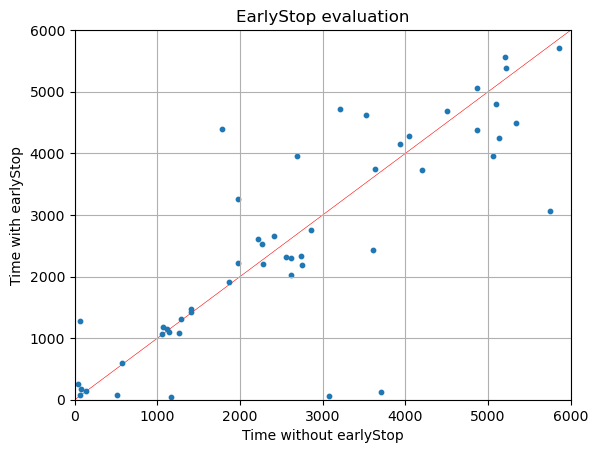

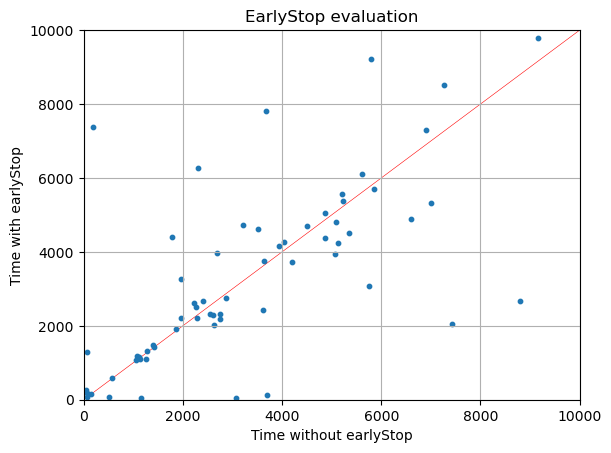

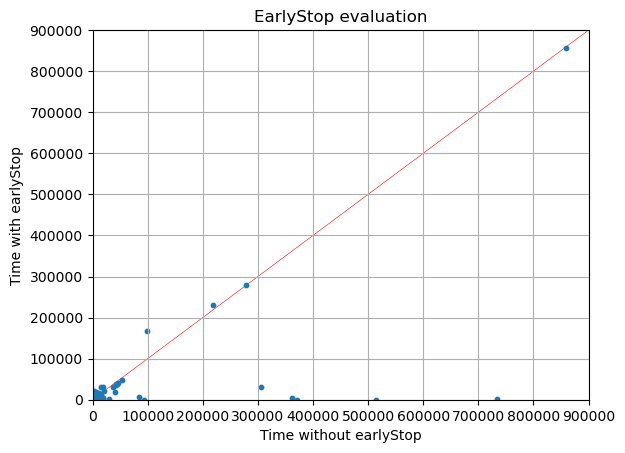

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

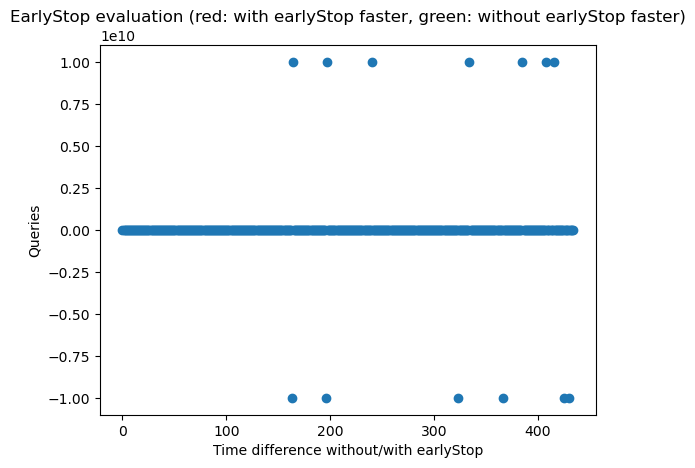

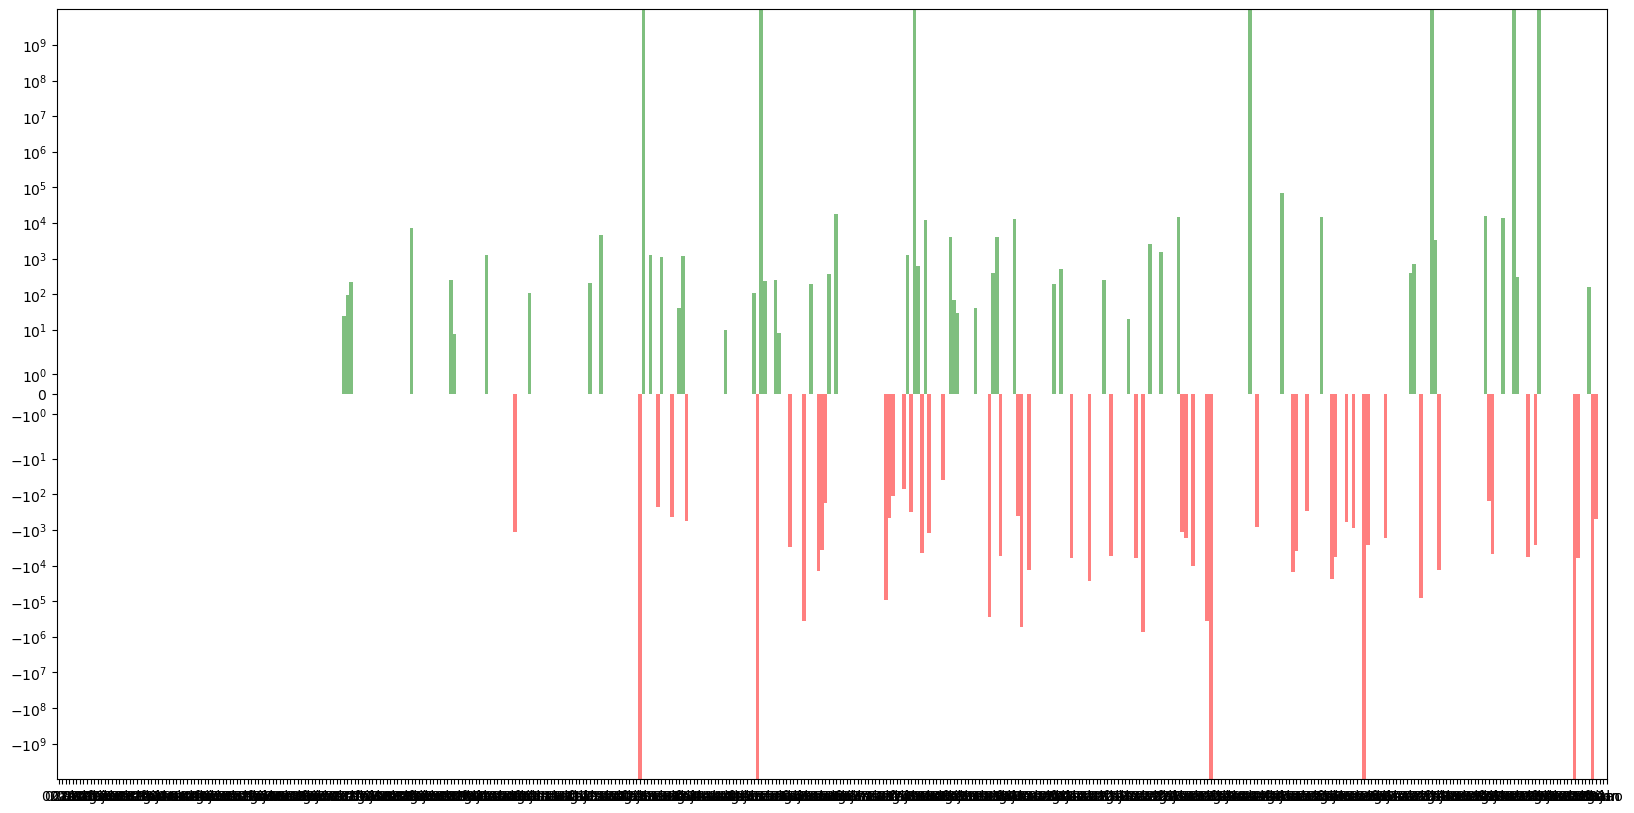

In [36]:
l_a = openFileByWildcard(os.path.join("./mergeout/basic/", "times_results*")).readlines()
l_b = openFileByWildcard(os.path.join("./mergeout/earlyStop/", "times_results*")).readlines()

l_a = fillMissingValues(l_a)
l_b = fillMissingValues(l_b)

val_a = [parseTimeToMS(r.split(";")[1]) for r in l_a]
val_b = [parseTimeToMS(r.split(";")[1]) for r in l_b]

scatterplot2(val_a, val_b, "Time without earlyStop", "Time with earlyStop", "EarlyStop evaluation", "./EarlyStopEvalScatterPlot.png")
scatterplotWithLim(val_a, val_b, "Time without earlyStop", "Time with earlyStop", "EarlyStop evaluation", "./EarlyStopEval10kScatterPlot.png", 10000, 10000)
scatterplotWithLim(val_a, val_b, "Time without earlyStop", "Time with earlyStop", "EarlyStop evaluation", "./EarlyStopEval900kScatterPlot.png", 900000, 900000)

diffPlot2(val_a, val_b, "Time difference without/with earlyStop", "Queries", "EarlyStop evaluation (red: with earlyStop faster, green: without earlyStop faster)", "./EarlyStopEvalDiffPlot.png", queries)




In [37]:
a = np.array(val_a)
b = np.array(val_b)

# remove not solved
a[a==9999999999.0]=0
b[b==9999999999.0]=0

ind = []
for j in range(len(a)):
    if a[j] == 0 or b[j] == 0:
        ind.append(j)
    j = j + 1

a = np.delete(a, ind)
b = np.delete(b, ind)

diffs = np.subtract(a, b)

#print("base" + "        " + "es" + "        " + "diff")
#for j in range(len(a)):
#    print(str(a[j]) + " " + str(b[j]) + " " + str(diffs[j]))
#min = np.min(diffs)
#max = np.max(diffs)

avg = np.average(diffs)

print("Values in ms")
print(f"minimal difference (with sign --> best for w/o earlyStop): {min}, maximal difference (with sign --> best for earlyStop): {max}")
print(f"average difference (negative --> w/o early stop better, positive --> early stop better): {avg}") # --> earlyStop around 25 secs faster on average
print(f"median difference (negative --> w/o early stop better, positive --> early stop better): {np.median(diffs)}") # --> earlyStop around 16 ms faster in median

Values in ms
minimal difference (with sign --> best for w/o earlyStop): <built-in function min>, maximal difference (with sign --> best for earlyStop): <built-in function max>
average difference (negative --> w/o early stop better, positive --> early stop better): 24800.627835051546
median difference (negative --> w/o early stop better, positive --> early stop better): 40.0


In [38]:
a_better_count, b_better_count = countRT(val_a, val_b) # excluding unsolved instances

# a_better: w/o earlyStop better
# b_better: earlyStop better
print(a_better_count, b_better_count )

# --> nothing better --> (48 vs 49)


48 49


In [39]:
a_better_count, b_better_count = count(maxmemlist1, maxmemlist2)

# a_better: w/o earlyStop better
# b_better: earlyStop better
print(a_better_count, b_better_count )

# --> earlyStop better (40 vs 57)

40 57


In [40]:
a_better_count, b_better_count = count(maxdisklist1, maxdisklist2)

# a_better: w/o earlyStop better
# b_better: earlyStop better
print(a_better_count, b_better_count )

# --> w/o earlyStop better (0 vs 0)

0 0


In [41]:
ind = []
for j in range(len(maxmemlist1)):
    if maxmemlist1[j] == 0 or maxmemlist2[j] == 0:
        ind.append(j)
    j = j + 1

mm1 = np.delete(maxmemlist1, ind)
mm2 = np.delete(maxmemlist2, ind)

diffs = np.subtract(np.array(mm1), np.array(mm2))
#print("base" + "        " + "es" + "        " + "diff")
#for j in range(len(mm1)):
#    print(str(mm1[j]) + " " + str(mm2[j]) + " " + str(diffs[j]))
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in Bytes")
print(f"minimal difference (with sign --> best for w/o earlyStop): {min}, maximal difference (with sign --> best for earlyStop): {max}")
print(f"average difference (negative --> w/o earlyStop better, positive --> earlyStop better): {avg}") # --> earlyStop at avg 1.1GB better than w/o earlystop
print(f"median difference (negative --> w/o early stop better, positive --> early stop better): {np.median(diffs)}") # --> earlyStop around 25 mb better in median

Values in Bytes
minimal difference (with sign --> best for w/o earlyStop): -8756240166.0, maximal difference (with sign --> best for earlyStop): 47365779790.0
average difference (negative --> w/o earlyStop better, positive --> earlyStop better): 1101576750.7835052
median difference (negative --> w/o early stop better, positive --> early stop better): 26716434.0


In [42]:
def countOccurrence(vals, val):
    c = 0
    for v in vals:
        if v == val:
            c = c + 1
    return c

In [43]:
# count unsolved
val_a_unsolved = countOccurrence(val_a, 9999999999.0)
val_b_unsolved = countOccurrence(val_b, 9999999999.0)

print(f"w/o earlyStop unsolved: {val_a_unsolved}, earlyStop unsolved: {val_b_unsolved}")
if val_a_unsolved < val_b_unsolved:
    print("w/o earlyStop better")
elif val_b_unsolved < val_a_unsolved:
    print("earlyStop better")

w/o earlyStop unsolved: 331, earlyStop unsolved: 332
w/o earlyStop better


[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

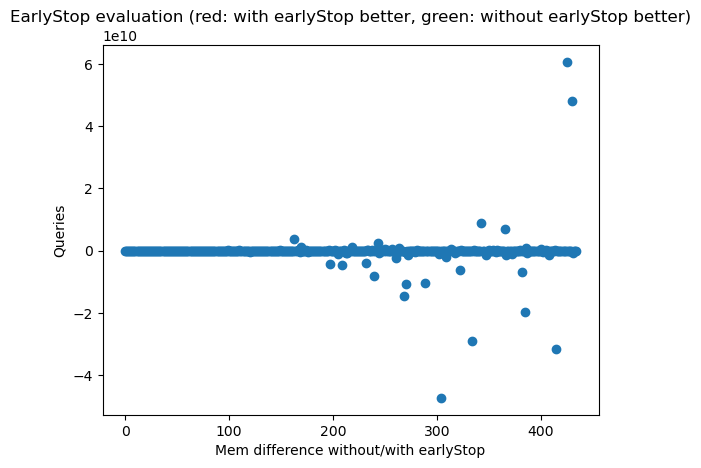

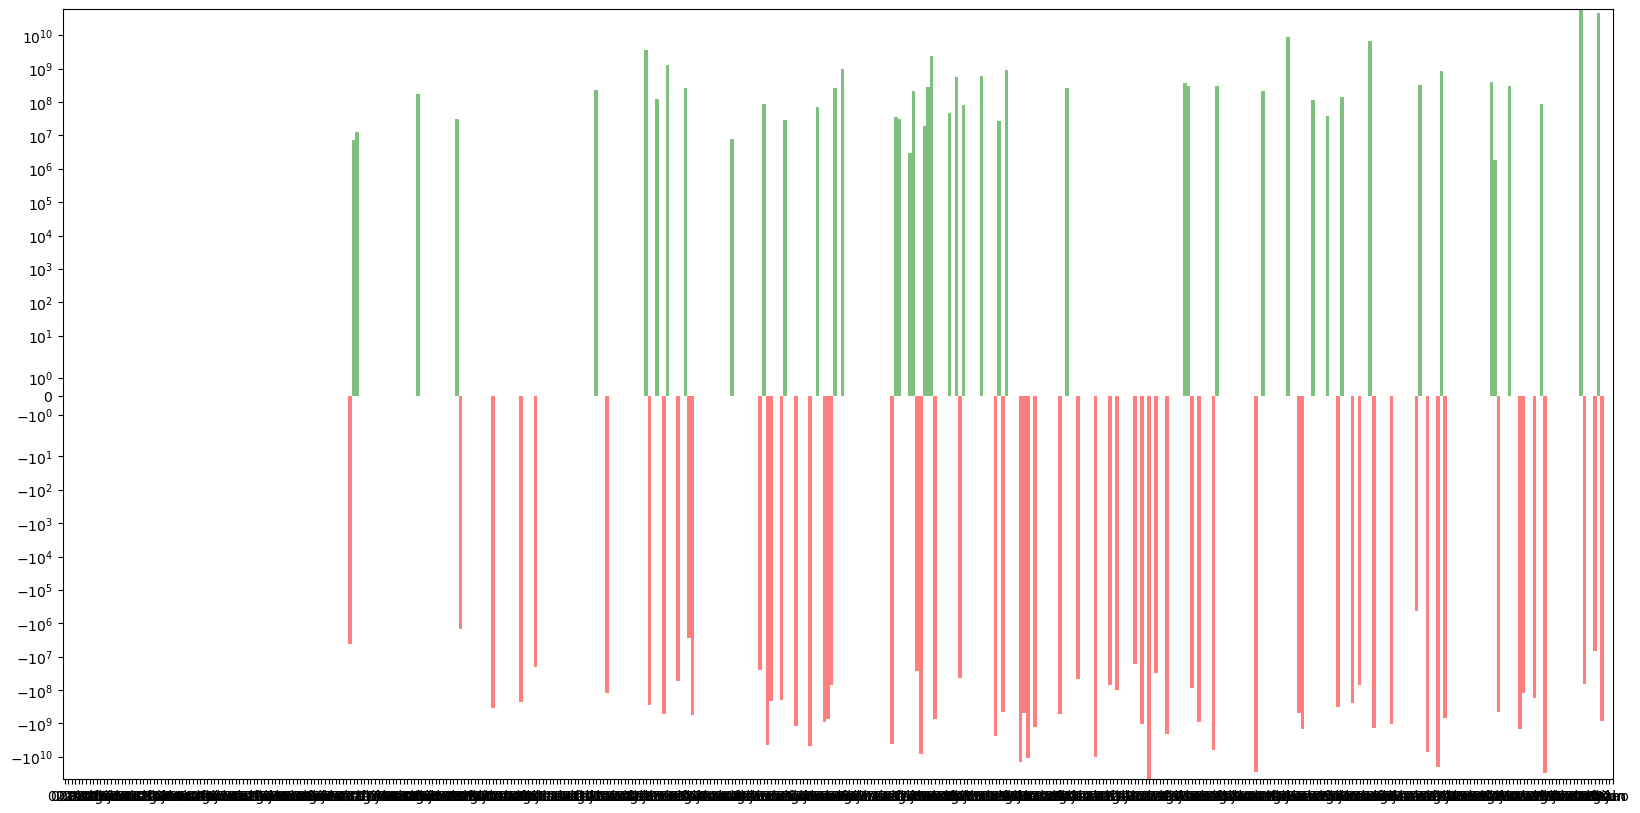

In [44]:
diffPlot2(maxmemlist1, maxmemlist2, "Mem difference without/with earlyStop", "Queries", "EarlyStop evaluation (red: with earlyStop better, green: without earlyStop better)", "./EarlyStopEvalMemRGPlot.png", queries)


In [45]:
def diffPlot(normal, yan, xlabel, ylabel, title, pathToSave, xticks):
  diffs = np.subtract(np.array(yan), np.array(normal))
  x = [x for x in range(0,len(normal))]
  plt.scatter(x, diffs)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  #plt.grid()
  fig, ax = plt.subplots()
  fig.set_size_inches(180.5, 10.5)
  print(np.min(diffs))
  plt.yscale('symlog')
  plt.ylim(np.min(diffs)-5,np.max(diffs)+5)
  plt.xlim(-0.5,len(normal)+0.5)

  plt.xticks(x, labels=xticks)

  for i in range(0,len(normal)):
    if diffs[i]>0:
      #plt.fill_between(i, diffs[i], facecolor='green', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'g', alpha=.5)
    elif diffs[i]<0:
      #plt.fill_between(i, diffs[i], facecolor='red', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'r', alpha=.5)

  plt.savefig(pathToSave)
  plt.show()



